# Linear Regression with Python

## References: 
* https://medium.com/@khanmazhar9101/linear-regression-in-python-explained-with-coding-examples-9514523dd48e
* https://medium.com/mlearning-ai/regression-with-python-from-scratch-polynomial-regression-3e186198ae0c
* https://medium.com/towards-data-science/simple-and-multiple-linear-regression-in-python-c928425168f9
* https://benjaminobi.medium.com/4-python-libraries-for-basic-data-science-da80e17cd7ff
* https://towardsdev.com/linear-regression-with-numpy-7345d4a51c30
* https://towardsdatascience.com/regression-plots-with-pandas-and-numpy-faf2edbfad4f
* https://heartbeat.comet.ml/linear-regression-a-complete-guide-1c124fc7988a
* https://medium.com/@contactsunny/linear-regression-in-python-using-scikit-learn-f0f7b125a204
* https://blog.jovian.ai/how-to-predict-housing-prices-with-linear-regression-b7c5a6fe1175
* https://gopi-krishna.medium.com/the-concept-of-linear-regression-part-1-7352bcf870b3
* https://gopi-krishna.medium.com/linear-regression-part-2-772ff597b600
* https://medium.com/@thevie/predicting-boston-housing-prices-step-by-step-linear-regression-tutorial-from-scratch-in-python-c50a09b70b22
* https://heartbeat.comet.ml/linear-regression-a-complete-guide-1c124fc7988a
* https://medium.com/@khanmazhar9101/linear-regression-in-python-explained-with-coding-examples-9514523dd48e
* https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
* https://heartbeat.comet.ml/linear-regression-using-keras-and-python-7cee2819a60c

## Linear regression with Numpy


### Import libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Create dataset

In [2]:
df = pd.DataFrame(np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

A   B
0  30  54
1  52  94
2  58  67
3  75  35
4  77  69

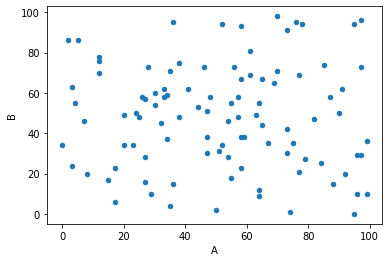

In [3]:
df.plot.scatter(x='A', y='B')
plt.show()

In [4]:
df['C'] = 2*df['A'] + 3

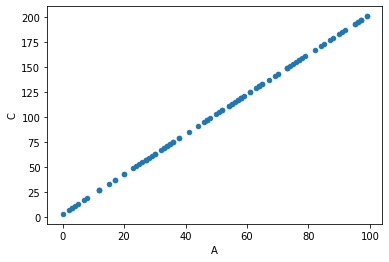

In [5]:
df.plot.scatter(x='A', y='C')
plt.show()

In [6]:
df['D'] = pd.Series(np.random.normal(0, 5, 100))

df['E'] = df['C'] + df['D']

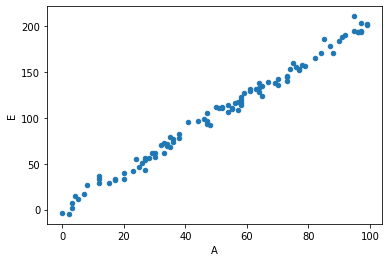

In [7]:
df.plot.scatter(x='A', y='E')
plt.show()

### Regression

In [8]:
x = df['A'].to_numpy().reshape(len(df), 1)
X = np.append(x, np.ones((len(df), 1)), axis=1)
y = df['E'].to_numpy().reshape(len(df), 1)

In [9]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [10]:
y_pred = theta[0]*x + theta[1]

In [11]:
theta[0],theta[1]

(array([2.03015038]), array([1.15948916]))

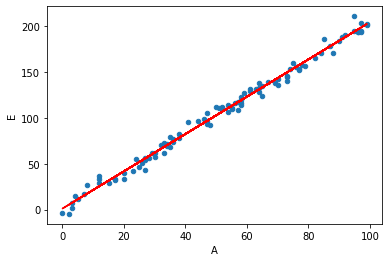

In [12]:
df.plot.scatter(x='A', y='E')
plt.plot(x,y_pred,color='r')
plt.show()

### Finding error and R²

In [13]:
MSE = np.square(np.subtract(y, y_pred)).mean()
MSE

28.160254682826192

In [14]:
SSE = np.sum(np.square(np.subtract(y, y_pred)))
SSE

2816.0254682826194

In [15]:
SSR = np.sum(np.square(np.subtract(y.mean(), y_pred)))
SSR

312810.2454538847

In [16]:
SST = SSR + SSE
SST

315626.27092216734

In [17]:
R_squared = SSR / SST
R_squared

0.9910779750365677

There is a strong relationship between x and y

## Regression Plots with Pandas and Numpy


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
weather = pd.read_csv('https://raw.githubusercontent.com/alanjones2/dataviz/master/londonweather.csv')

In [20]:
weather.head()

Year  Month  Tmax  Tmin  Rain    Sun
0  1957      1   8.7   2.7  39.5   53.0
1  1957      2   9.0   2.9  69.8   64.9
2  1957      3  13.9   5.7  25.4   96.7
3  1957      4  14.2   5.2   5.7  169.6
4  1957      5  16.2   6.5  21.3  195.0

In [21]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    748 non-null    int64  
 1   Month   748 non-null    int64  
 2   Tmax    748 non-null    float64
 3   Tmin    748 non-null    float64
 4   Rain    748 non-null    float64
 5   Sun     748 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 35.2 KB


In [22]:
july = weather.query('Month == 7')
july.insert(0,'Yr',range(0,len(july)))

In [23]:
july

Yr  Year  Month  Tmax  Tmin  Rain    Sun
6     0  1957      7  22.5  13.8  87.0  152.3
18    1  1958      7  21.7  12.9  51.9  190.5
30    2  1959      7  24.7  13.3  86.5  276.9
42    3  1960      7  20.1  12.4  67.2  139.7
54    4  1961      7  22.1  12.1  26.2  180.0
..   ..   ...    ...   ...   ...   ...    ...
690  57  2014      7  25.8  15.0  50.0  246.4
702  58  2015      7  23.7  13.8  71.8  189.7
714  59  2016      7  24.0  14.5  16.0  182.8
726  60  2017      7  23.8  14.9  90.0  178.0
738  61  2018      7  28.3  16.4  14.8  272.5

[62 rows x 7 columns]

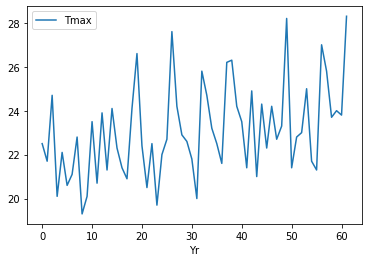

In [24]:
july.plot(y='Tmax',x='Yr')
plt.show()

In [25]:
d = np.polyfit(july['Yr'],july['Tmax'],1)
f = np.poly1d(d)

In [26]:
july.insert(6,'Treg',f(july['Yr']))
july

Yr  Year  Month  Tmax  Tmin  Rain       Treg    Sun
6     0  1957      7  22.5  13.8  87.0  21.610753  152.3
18    1  1958      7  21.7  12.9  51.9  21.658840  190.5
30    2  1959      7  24.7  13.3  86.5  21.706928  276.9
42    3  1960      7  20.1  12.4  67.2  21.755015  139.7
54    4  1961      7  22.1  12.1  26.2  21.803102  180.0
..   ..   ...    ...   ...   ...   ...        ...    ...
690  57  2014      7  25.8  15.0  50.0  24.351736  246.4
702  58  2015      7  23.7  13.8  71.8  24.399824  189.7
714  59  2016      7  24.0  14.5  16.0  24.447911  182.8
726  60  2017      7  23.8  14.9  90.0  24.495999  178.0
738  61  2018      7  28.3  16.4  14.8  24.544086  272.5

[62 rows x 8 columns]

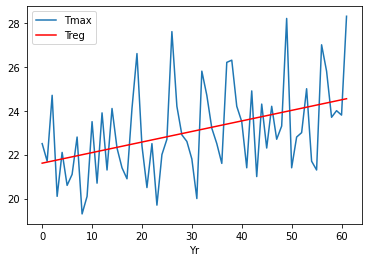

In [27]:
ax = july.plot(x = 'Yr',y='Tmax')
july.plot(x='Yr', y='Treg',color='Red',ax=ax)
plt.show()

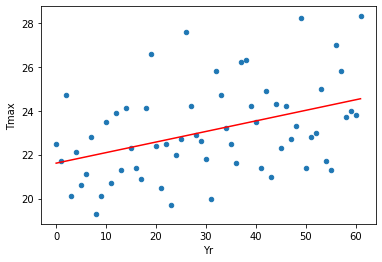

In [28]:
ax=july.plot.scatter(x='Yr', y='Tmax')
july.plot(x='Yr',y='Treg',color='Red',legend=False,ax=ax)
plt.show()

## Linear Regression in Python using SciKit Learn


In [29]:
import numpy
import matplotlib.pyplot as plot
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Data 
https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression



In [30]:
# Import the dataset
dataset = pandas.read_csv('./Data/Salary_Data.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [31]:

# Split the dataset into the training set and test set
# We're splitting the data in 1/3, so out of 30 rows, 20 rows will go into the training set,
# and 10 rows will go into the testing set.

In [32]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [33]:
linearRegressor = LinearRegression()

In [34]:
linearRegressor.fit(xTrain, yTrain)

LinearRegression()

In [35]:
yPrediction = linearRegressor.predict(xTest)

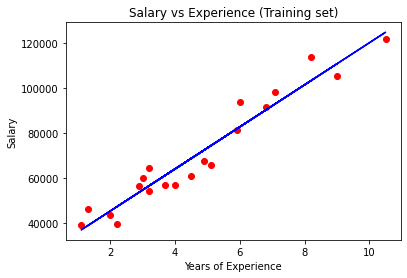

In [36]:
plot.scatter(xTrain, yTrain, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Salary vs Experience (Training set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

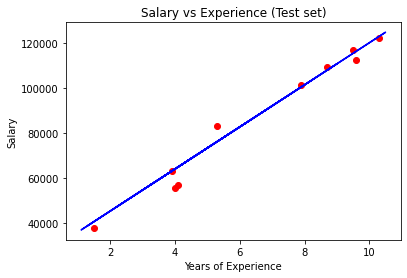

In [37]:
plot.scatter(xTest, yTest, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Salary vs Experience (Test set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

## How to Predict Housing Prices 🏠 with Linear Regression


https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

Attribute Information
Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]



In [38]:
# Import the libraries 

#Dataframe/Numerical libraries
import pandas as pd 
import numpy as np

#Data visualization 
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning model 
from sklearn.linear_model import LinearRegression 

In [41]:
#Reading the data
path='./Data/boston.csv'
housing_df=pd.read_csv(path)

In [42]:
housing_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [43]:
# Check if there is any missing values.
housing_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [47]:
#To check the data type of each columns
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [48]:
housing_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [49]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =14
matplotlib.rcParams['figure.figsize']= (10,6)
matplotlib.rcParams['figure.facecolor'] ='#00000000'

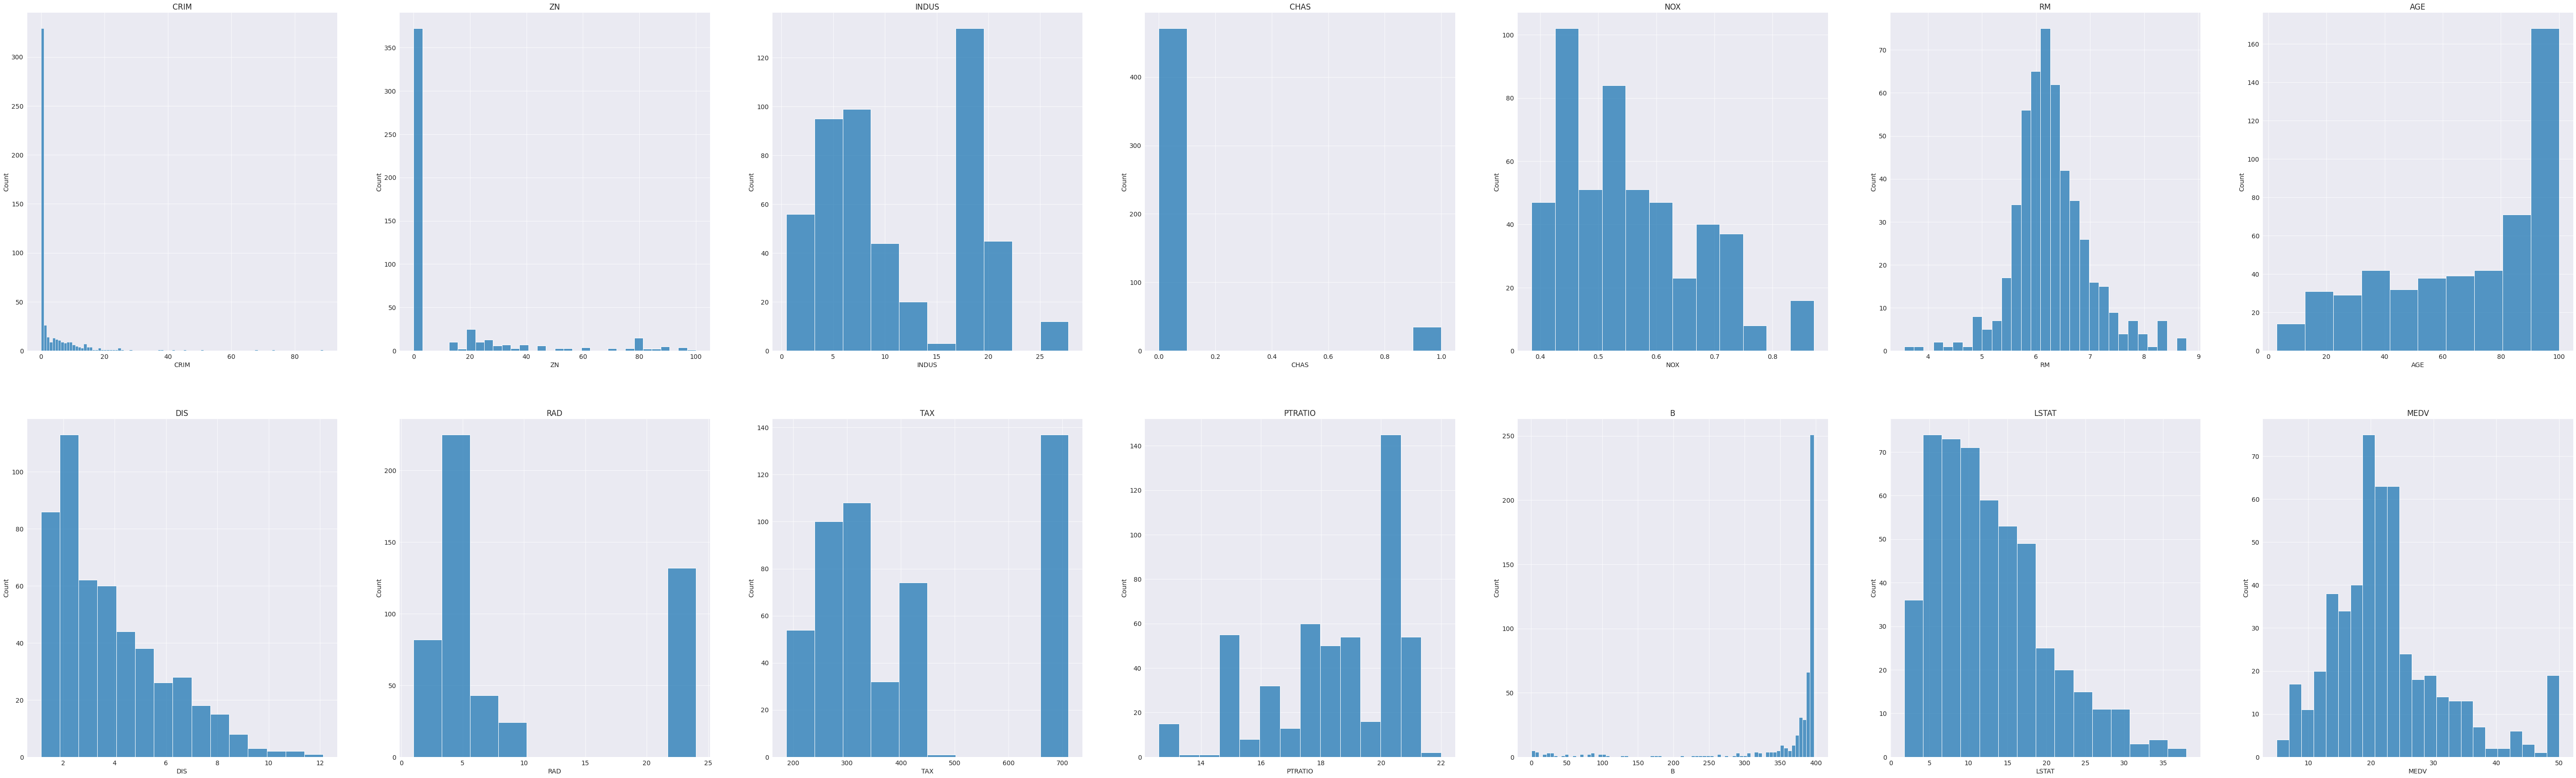

In [50]:
fig,ax=plt.subplots(2,7,figsize=(100,30))
j=0
d=0
part1=housing_df.columns[0:7]
part2=housing_df.columns[7:14]

for k in part2:
    for i in part1:
        if j<7:
            ax[0,j].set_title(i)
            sns.histplot(data=housing_df,x=i,ax=ax[0,j])
            j+=1
    if d<7:
        ax[1,d].set_title(k)
        sns.histplot(data=housing_df,x=k,ax=ax[1,d])
        d+=1

Inferences
1) The crime rate is fairly low. Most values reside in 0 to 25. With a large value with 0 value

2) Most residential land zoned are less than 25,000 sqft. Land zones that are over 25,000 sqft represent a very parse sample of the dataset

3) The proportion of non-retail business acres is mainly distributed among 2 range 0-13 and 13-23

4) Most of the properties are bounded the river and a small amount of data does not

5) The concentration of nitrite dioxide follows a downwards trend from .3 to .7 with a small bum towards .8. The value between 0.1-1 is acceptable to leave in.

6) The number of rooms concentrates around the mean

7) The proportion of owner-occupied units increases with time

8) The weight distance between 5 employment centers decreases as far as the number of weight increases. It might mean people tend to dwell new high employment center

9) People tend to dwell in areas where the accessibility to highways is low(0-10). We have an outlier in the range of 30

10) Most taxes of dwelling are between the range 200-450 with big outliers around 700k dollars

11) Lower status percentage concentrates around the median. Most people are of lower status

### Preprocessing


In [51]:
new_df=housing_df[housing_df['TAX']<600]

In [52]:
new_df.shape

(369, 14)

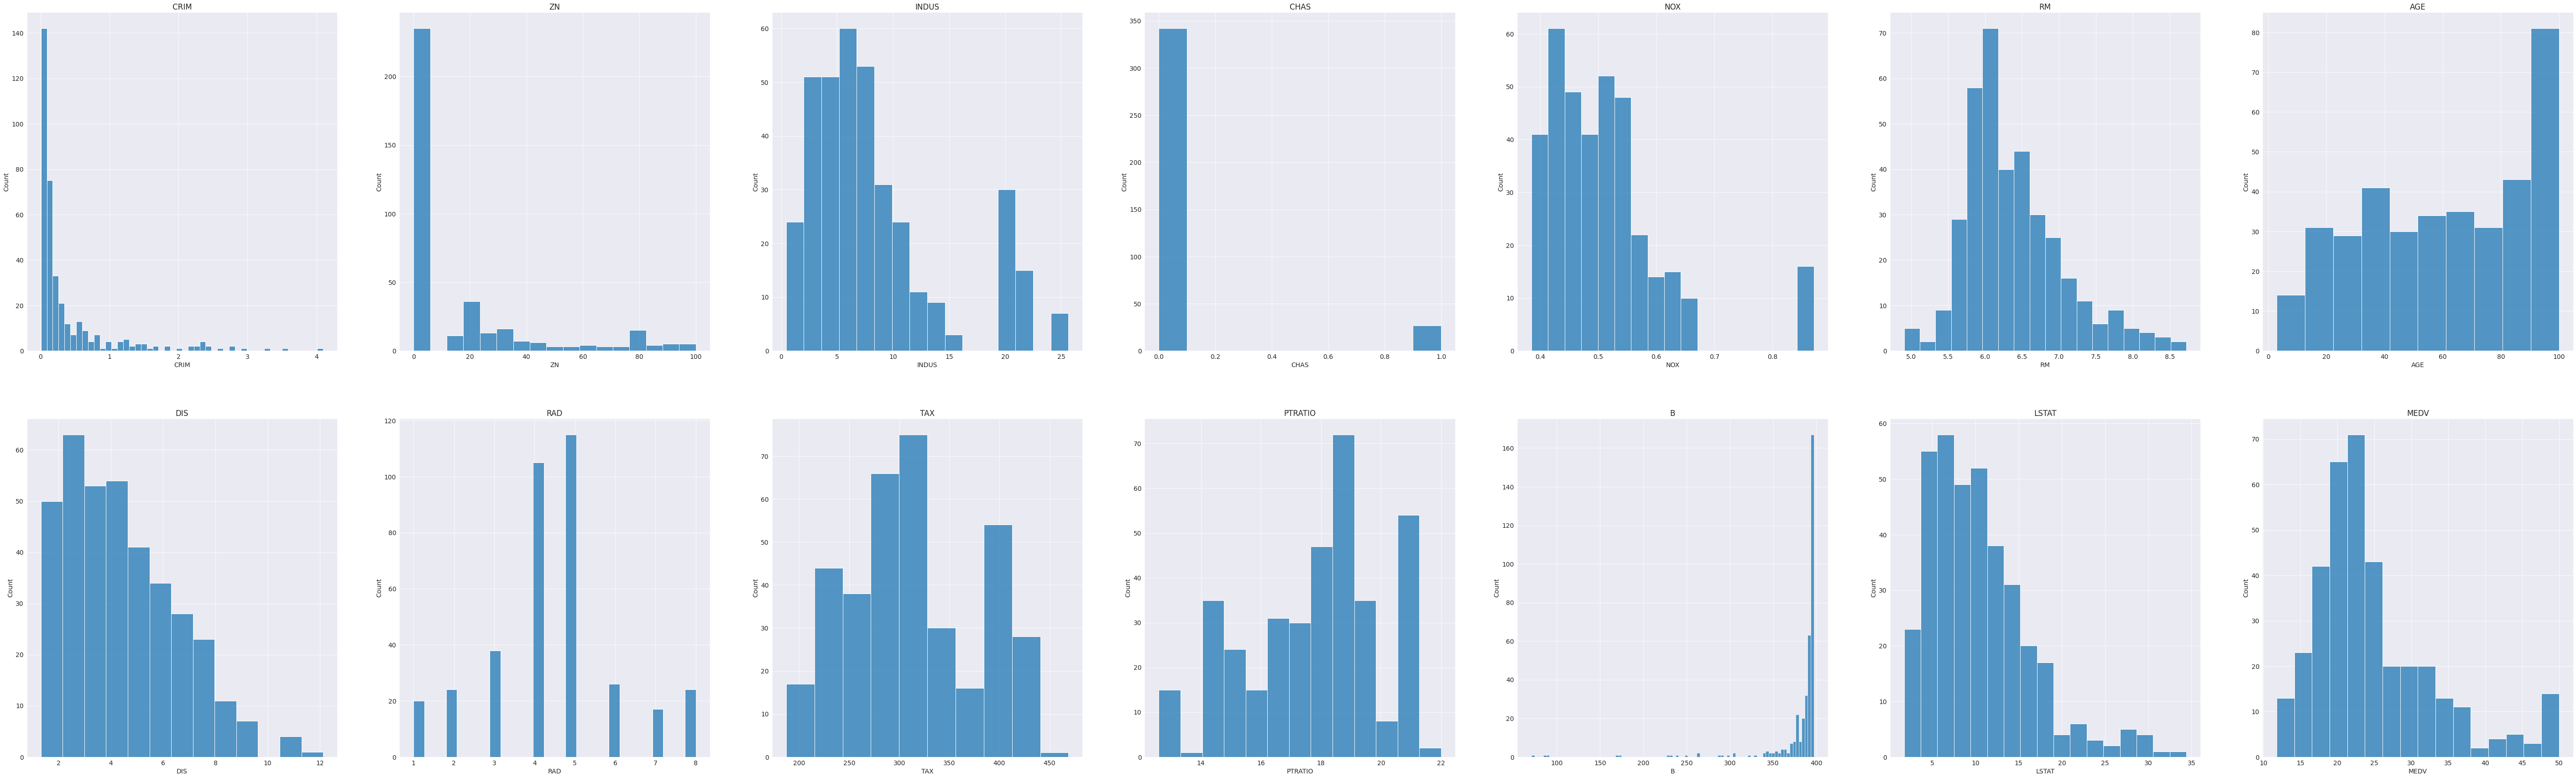

In [53]:
fig,ax=plt.subplots(2,7,figsize=(100,30))
j=0
d=0
part1=new_df.columns[0:7]
part2=new_df.columns[7:14]

for k in part2:
    for i in part1:
        if j<7:
            ax[0,j].set_title(i)
            sns.histplot(data=new_df,x=i,ax=ax[0,j])
            j+=1
    if d<7:
        ax[1,d].set_title(k)
        sns.histplot(data=new_df,x=k,ax=ax[1,d])
        d+=1

### Correlation

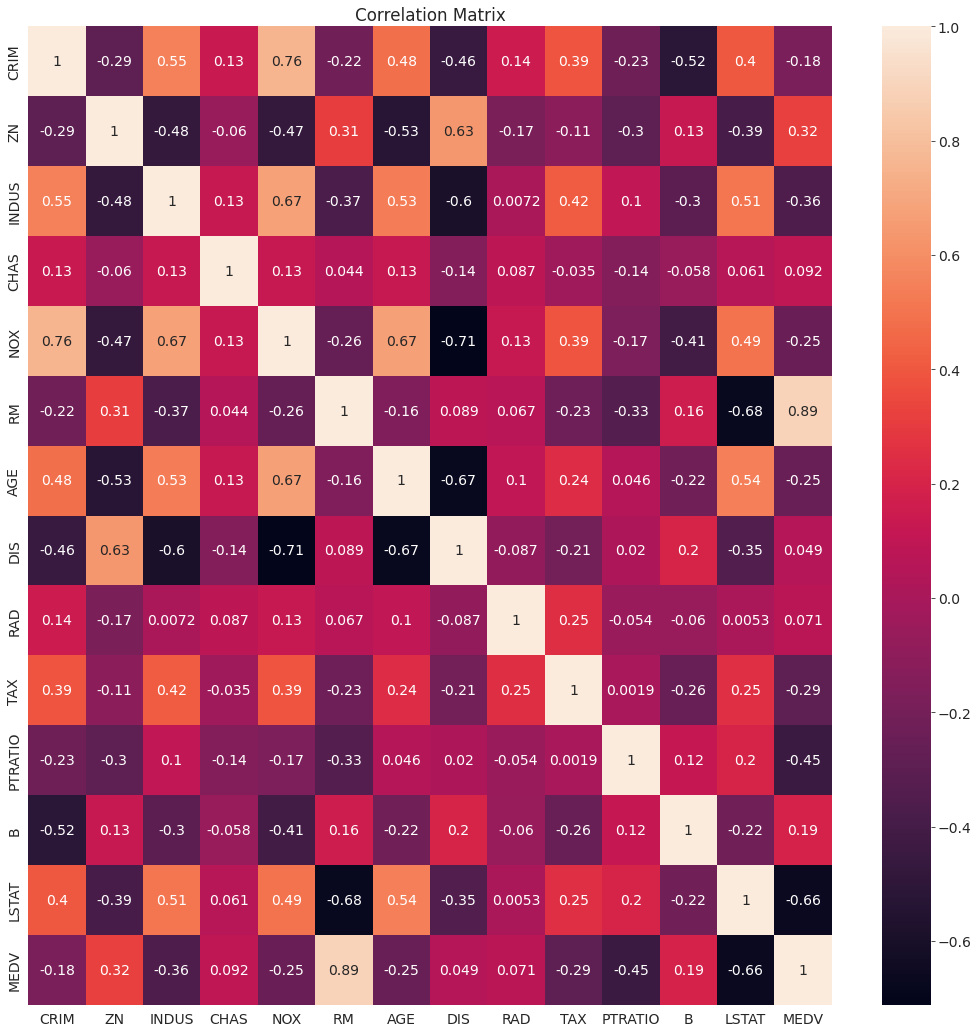

In [54]:
# correlation 
plt.figure(figsize=(18,18))
plt.title('Correlation Matrix')
sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [55]:
high_corr=new_df.corr().MEDV.sort_values(ascending=False) #Create a correlation matrix
high_corr_var=[] # create a variable to store the name

# loop through to the name
for name in high_corr.index:
    high_corr_var.append(name)# store the name into the variable 

high_corr_var.pop(0) # remove the 'MEDV' from the list
# high_corr_var

'MEDV'

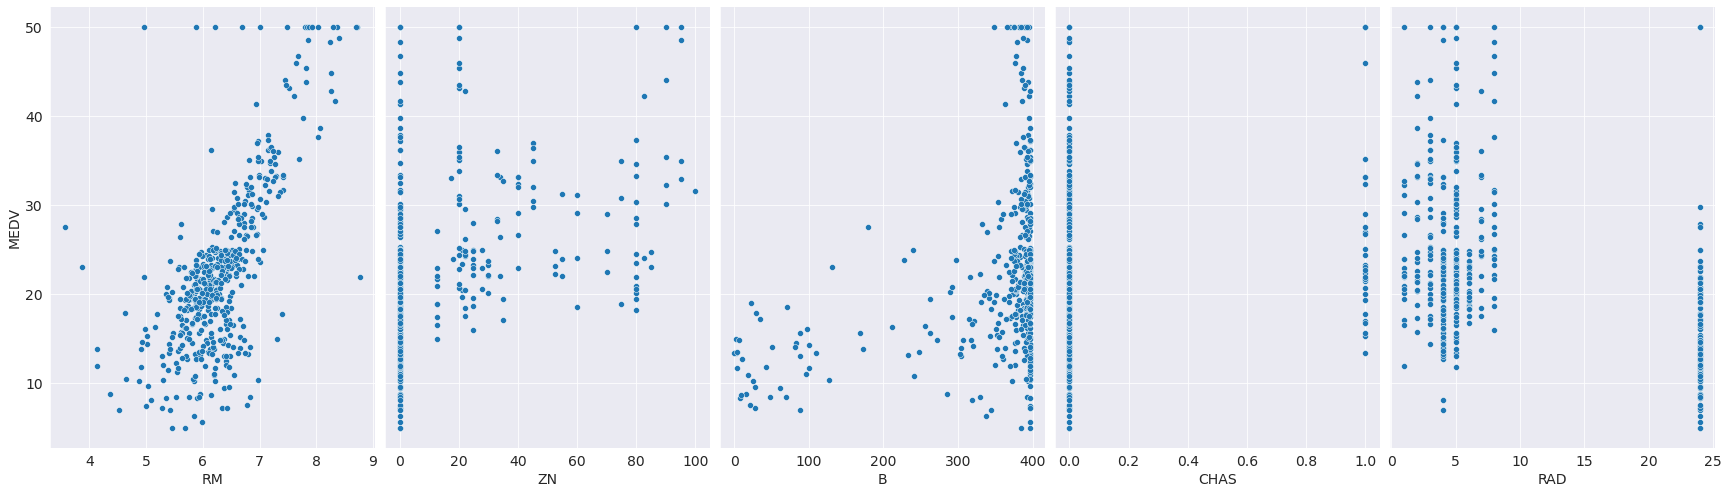

In [56]:
sns.pairplot(data=housing_df,x_vars=['RM','ZN','B','CHAS','RAD'],y_vars='MEDV',height=7,aspect=.7);


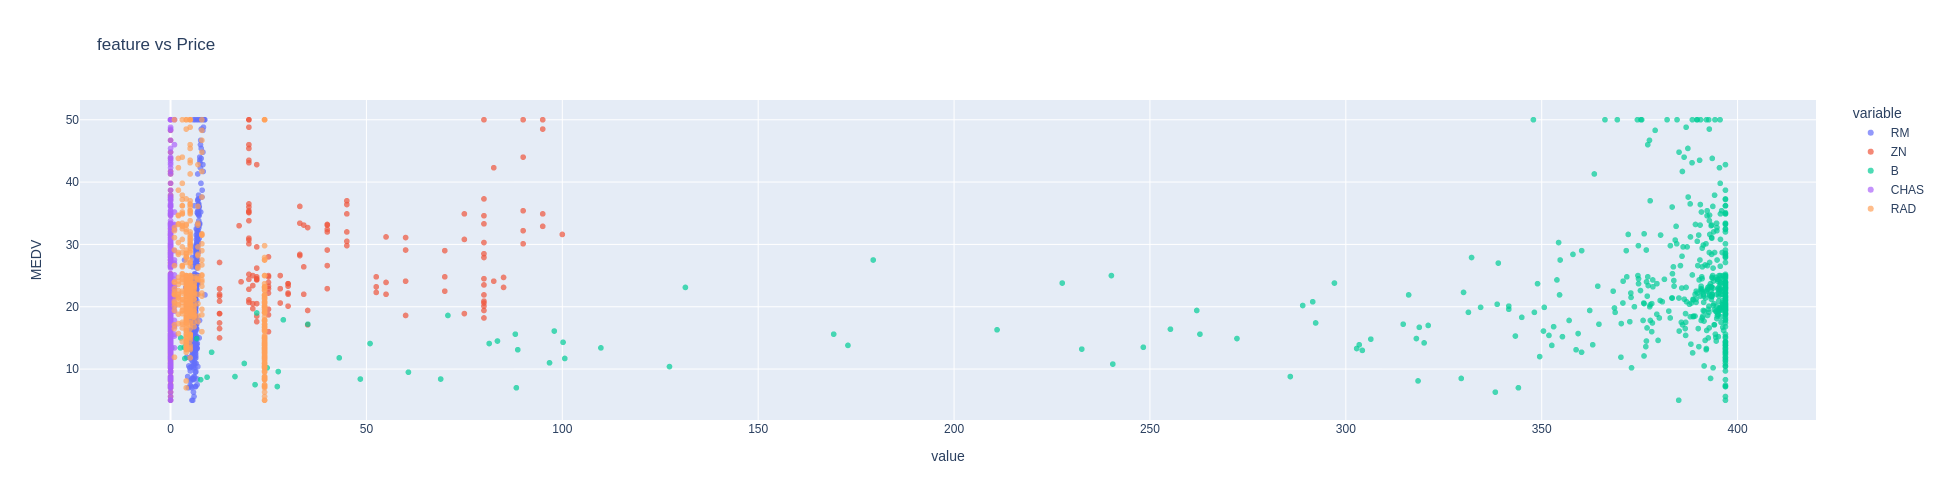

In [57]:
fig=px.scatter(housing_df,x=['RM','ZN','B','CHAS','RAD'],y='MEDV',title='feature vs Price',opacity=.7)
fig.update_layout(width=900,height=500)
fig.show()

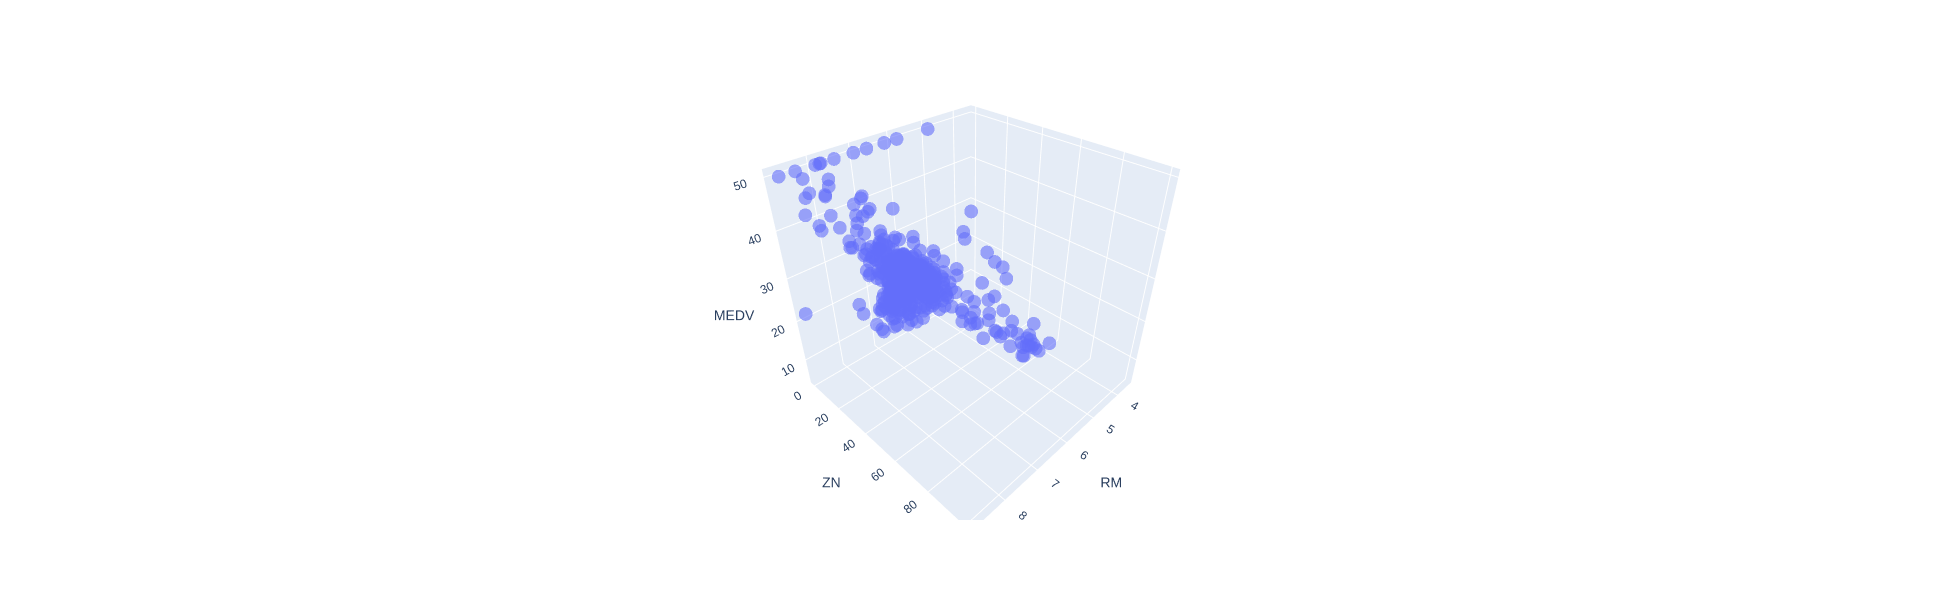

In [58]:
fig=px.scatter_3d(housing_df,x='RM',y='ZN',z='MEDV',size_max=8,opacity=.6)
fig.update_layout(width=1080,height=600)
fig.show()

In [59]:
#Create a list of features
cols_inputs=list(housing_df.columns)
cols_inputs.pop()
# df.drop(columns='MEDV', inplace=True)
X=new_df[cols_inputs]
y=new_df['MEDV']

#### Feature Scaling
Feature scaling facilitates gradient descent by making sure that the features are on the same scale. It makes it easier to find the local optimum.

One technique to use is mean normalization. It replaces the target with (target-mean) to make sure the feature has approximately zero mean.

In [60]:
def standard(X):
    '''Standard makes the feature 'X' have a zero mean'''
    mu=np.mean(X) #mean
    std=np.std(X) #standard deviation
    sta=(X-mu)/std # mean normalization
    return mu,std,sta 

In [61]:
mu,std,sta=standard(X)
X=sta
X

/home/ernesto/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.609129  0.092792 -1.019125 -0.280976  0.258670  0.279135  0.162095   
1   -0.575698 -0.598153 -0.225291 -0.280976 -0.423795  0.049252  0.648266   
2   -0.575730 -0.598153 -0.225291 -0.280976 -0.423795  1.189708  0.016599   
3   -0.567639 -0.598153 -1.040806 -0.280976 -0.532594  0.910565 -0.526350   
4   -0.509220 -0.598153 -1.040806 -0.280976 -0.532594  1.132984 -0.228261   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.519445 -0.598153  0.585220 -0.280976  0.604848  0.306004  0.300494   
502 -0.547094 -0.598153  0.585220 -0.280976  0.604848 -0.400063  0.570195   
503 -0.522423 -0.598153  0.585220 -0.280976  0.604848  0.877725  1.077657   
504 -0.444652 -0.598153  0.585220 -0.280976  0.604848  0.606046  1.017329   
505 -0.543685 -0.598153  0.585220 -0.280976  0.604848 -0.534410  0.715691   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
0   -0.167660 -2.105767 -0.235130 -1.136863  0.401318 -0.933659  
1    0.250975 -1.496334 -1.032339 -0.004175  0.401318 -0.219350  
2    0.250975 -1.496334 -1.032339 -0.004175  0.298315 -1.096782  
3    0.773661 -0.886900 -1.327601  0.403593  0.343869 -1.283945  
4    0.773661 -0.886900 -1.327601  0.403593  0.401318 -0.873561  
..        ...       ...       ...       ...       ...       ...  
501 -0.936773 -2.105767 -0.574682  1.445666  0.277056 -0.128344  
502 -1.027984 -2.105767 -0.574682  1.445666  0.401318 -0.229652  
503 -1.085260 -2.105767 -0.574682  1.445666  0.401318 -0.820331  
504 -0.979587 -2.105767 -0.574682  1.445666  0.314006 -0.676095  
505 -0.924173 -2.105767 -0.574682  1.445666  0.401318 -0.435703  

[369 rows x 13 columns]

In [62]:
X=new_df[['RM']]
mu,std,sta=standard(X)
X=sta
X

/home/ernesto/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



RM
0    0.279135
1    0.049252
2    1.189708
3    0.910565
4    1.132984
..        ...
501  0.306004
502 -0.400063
503  0.877725
504  0.606046
505 -0.534410

[369 rows x 1 columns]

In [63]:
#Import the libraries to train the model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [65]:
#Create and Train the model
model=LinearRegression().fit(X_train,y_train)

#Generate prediction
predictions_test=model.predict(X_test)
#Compute loss to evaluate the model
coefficient= model.coef_
intercept=model.intercept_
print(coefficient,intercept)

[7.3059118] 25.007015653290676


In our case, we begin to train our model with the following hypothesis:

Price = 24.85 + 7.18*ROOM

It is interpreted as:

For a given price of a house:

A unit increase in the number of rooms is associated with a 7.18 unit increase in the price.

As a side note, it is an association that is not causation!

In [66]:
high_corr_var

['RM',
 'ZN',
 'B',
 'CHAS',
 'RAD',
 'DIS',
 'CRIM',
 'NOX',
 'AGE',
 'TAX',
 'INDUS',
 'PTRATIO',
 'LSTAT']

We need an evaluation metric to evaluate if our hypothesis was correct. We will use RMSE method



#### Root Mean Square Error


Root Mean Square Error (RMSE) is the square root of the mean of square error. The error is the difference between the true and predicted values. It is often used because it is interpretable in the y-units which is in our case the median price a house.

In [67]:
def rmse(predict,actual):
    return np.sqrt(np.mean(np.square(predict - actual)))

In [68]:
# Split the Data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)
#Create and Train the model
model=LinearRegression().fit(X_train,y_train)

#Generate prediction
predictions_test=model.predict(X_test)

#Compute loss to evaluate the model
coefficient= model.coef_
intercept=model.intercept_
print(coefficient,intercept)

loss=rmse(predictions_test,y_test)
print('loss: ',loss)
print(model.score(X_test,y_test)) #accuracy

[7.63248487] 25.014397888710054
loss:  3.6399371249091006
0.7795728599775744


We will loop through each parameter to help us choose the numbers features to use in our model with Forward Selection

Forward Selection

Identify the best variable (in our case based on high correlation)
Add the next best variable into the model
And so on until some predefined criteria are satisfied

In [69]:
cols=[]
los=[]
los_train=[]
scor=[]

i=0
while i < len(high_corr_var):
    cols.append(high_corr_var[i])
    
    # Select inputs variables
    X=new_df[cols]
    
    #mean normalization
    mu,std,sta=standard(X)
    X=sta
    
    # Split the data into training and testing
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=1)
    
    #fit the model to the training
    lnreg=LinearRegression().fit(X_train,y_train)
    
    #make prediction on the training test
    prediction_train=lnreg.predict(X_train)
    
    #make prediction on the testing test
    prediction=lnreg.predict(X_test)
    
    #compute the loss on train test
    loss=rmse(prediction,y_test)
    loss_train=rmse(prediction_train,y_train)
    los_train.append(loss_train)
    los.append(loss)
    
    #compute the score
    score=lnreg.score(X_test,y_test)
    scor.append(score)
    
    i+=1

/home/ernesto/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/home/ernesto/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/home/ernesto/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/home/ernesto/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the

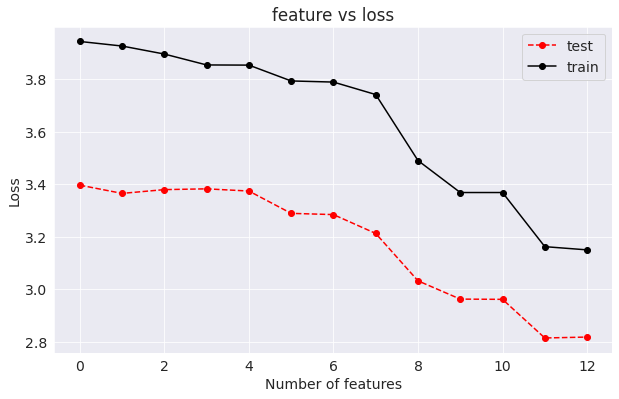

In [70]:
feature=np.arange(13)
plt.plot(feature,los,'r--o')
plt.plot(feature,los_train,'k-o')
plt.xlabel('Number of features')
plt.ylabel('Loss')
plt.legend(['test','train'])
plt.title('feature vs loss')
plt.show()

In [71]:
print(los)
print(min(los))
print('\n',scor)
print(max(scor))

[3.3964660205621504, 3.3651320970621956, 3.3794732924591906, 3.3824613995064383, 3.3740750214081556, 3.289146296070146, 3.284423623480389, 3.2126598659361356, 3.0323322409495685, 2.96279123123012, 2.961881364425188, 2.8148757377542557, 2.8183184099485246]
2.8148757377542557

 [0.8415480327933593, 0.8444581281529719, 0.843129556489101, 0.842852026313225, 0.843630316667246, 0.8514031961063317, 0.851829610849579, 0.858233837669637, 0.8737019473826503, 0.8794283543760109, 0.8795023975903021, 0.891166763955257, 0.8909003889456146]
0.891166763955257


In [72]:
high_corr_var

['RM',
 'ZN',
 'B',
 'CHAS',
 'RAD',
 'DIS',
 'CRIM',
 'NOX',
 'AGE',
 'TAX',
 'INDUS',
 'PTRATIO',
 'LSTAT']

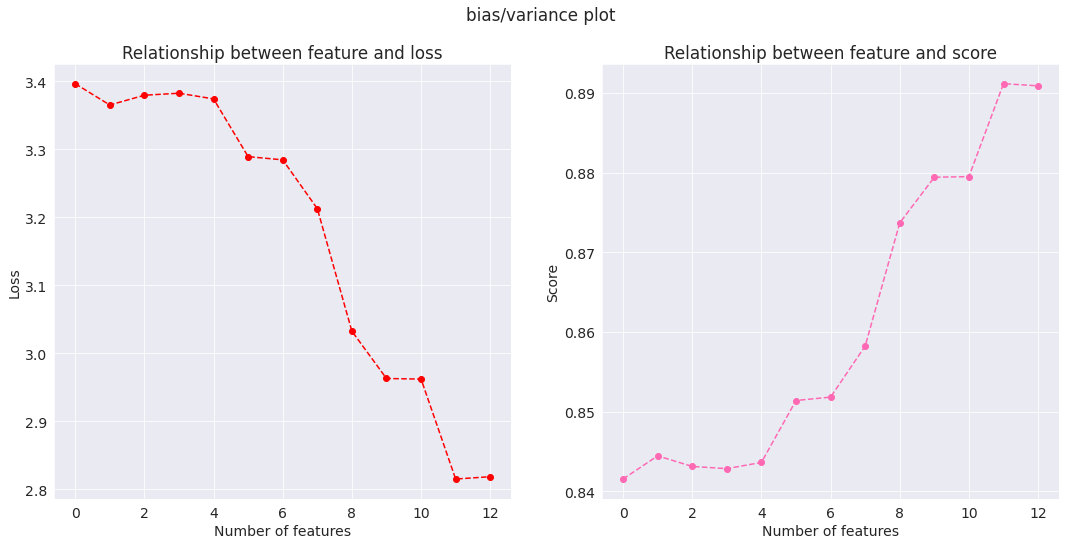

In [73]:
feature=np.arange(13)
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(18,8))
fig.suptitle('bias/variance plot')
# plot the relationship between feature and the loss
#axes for plotting
ax1.plot(feature,los,'r--o')
ax1.set_xlabel('Number of features')
ax1.set_ylabel('Loss')
ax1.set_title('Relationship between feature and loss')

#plot the relationship between feature and the score
#axes for plotting
ax2.plot(feature,scor,c='hotpink',marker='o',ls='--')
ax2.set_xlabel('Number of features')
ax2.set_ylabel('Score')
ax2.set_title('Relationship between feature and score')

plt.show()

In [74]:
# Create a list of features names
feature_cols=['RM','ZN','B','CHAS','RAD','CRIM','DIS','NOX']

#Select inputs variables
X=new_df[feature_cols]

# Split the data into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(X,y, random_state=1)

# feature engineering
mu,std,sta=standard(X)
X=sta

# fit the model to the trainning data
lnreg=LinearRegression().fit(X_train,y_train)

# make prediction on the testing test
prediction=lnreg.predict(X_test)

# compute the loss
loss=rmse(prediction,y_test)

print('loss: ',loss)
lnreg.score(X_test,y_test)

loss:  3.2126598659361405


/home/ernesto/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



0.8582338376696366

In [75]:
weights_df=pd.DataFrame({'feature':np.append(feature_cols,1),
                        'weights':np.append(lnreg.coef_,lnreg.intercept_)})
weights_df.sort_values('weights',ascending=False)

feature    weights
0      RM  10.289260
3    CHAS   1.635169
5    CRIM   1.399639
4     RAD   0.064212
1      ZN   0.038915
2       B   0.019075
6     DIS  -0.680032
7     NOX -12.434330
8       1 -40.478891

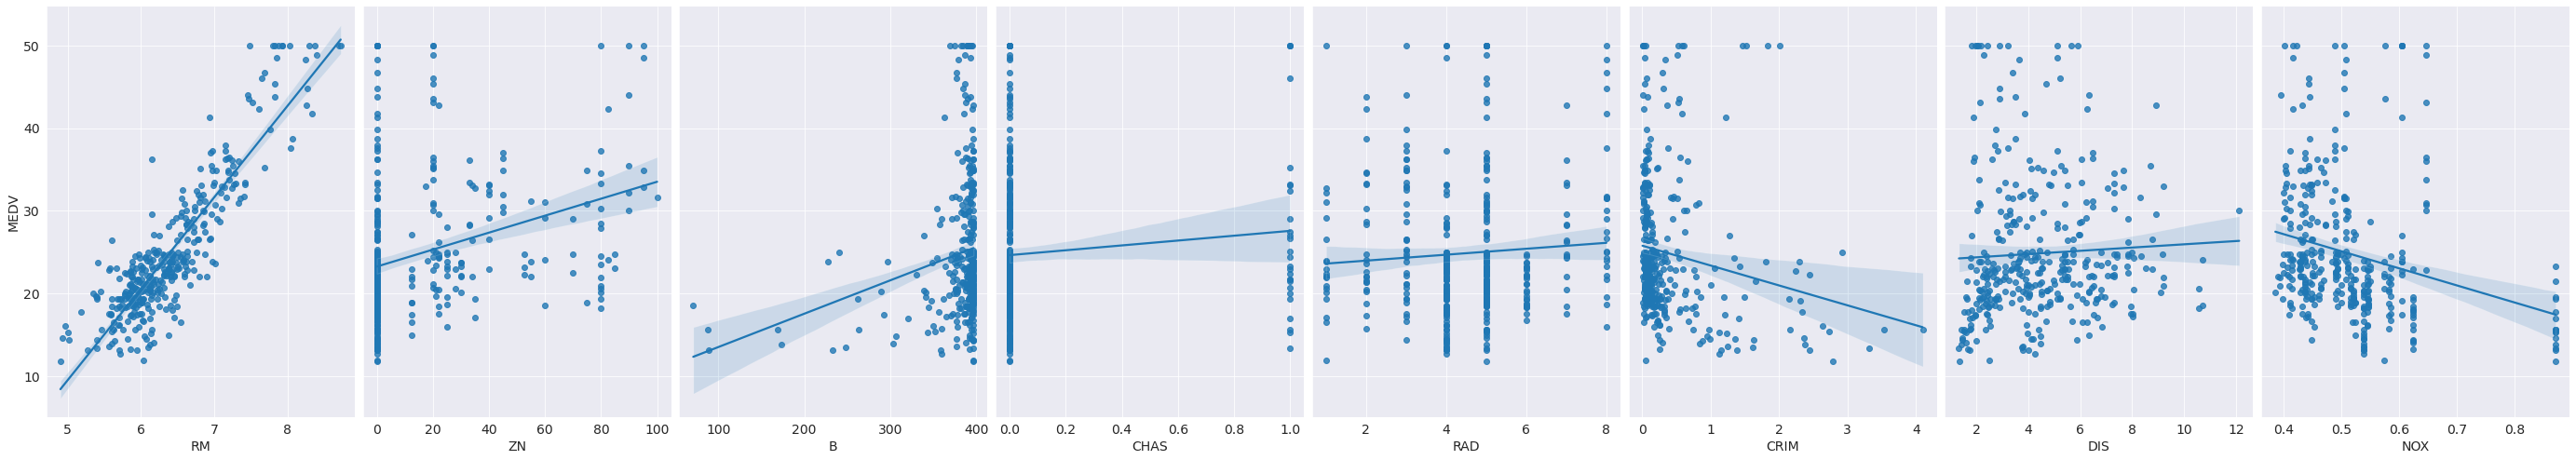

In [76]:
sns.pairplot(data=new_df,x_vars=feature_cols,y_vars='MEDV',height=7,aspect=0.7,kind='reg');


In [77]:
reg_corr=new_df[feature_cols +['MEDV']].corr()
reg_corr

RM        ZN         B      CHAS       RAD      CRIM       DIS  \
RM    1.000000  0.308619  0.155154  0.043789  0.067212 -0.220555  0.088672   
ZN    0.308619  1.000000  0.127976 -0.060212 -0.171166 -0.292718  0.633651   
B     0.155154  0.127976  1.000000 -0.058096 -0.059954 -0.523279  0.202948   
CHAS  0.043789 -0.060212 -0.058096  1.000000  0.086933  0.134326 -0.142665   
RAD   0.067212 -0.171166 -0.059954  0.086933  1.000000  0.144810 -0.087367   
CRIM -0.220555 -0.292718 -0.523279  0.134326  0.144810  1.000000 -0.457143   
DIS   0.088672  0.633651  0.202948 -0.142665 -0.087367 -0.457143  1.000000   
NOX  -0.263575 -0.471940 -0.410883  0.125781  0.130075  0.756747 -0.711938   
MEDV  0.889269  0.320577  0.191161  0.091612  0.070698 -0.181534  0.049400   

           NOX      MEDV  
RM   -0.263575  0.889269  
ZN   -0.471940  0.320577  
B    -0.410883  0.191161  
CHAS  0.125781  0.091612  
RAD   0.130075  0.070698  
CRIM  0.756747 -0.181534  
DIS  -0.711938  0.049400  
NOX   1.000000 -0.250309  
MEDV -0.250309  1.000000

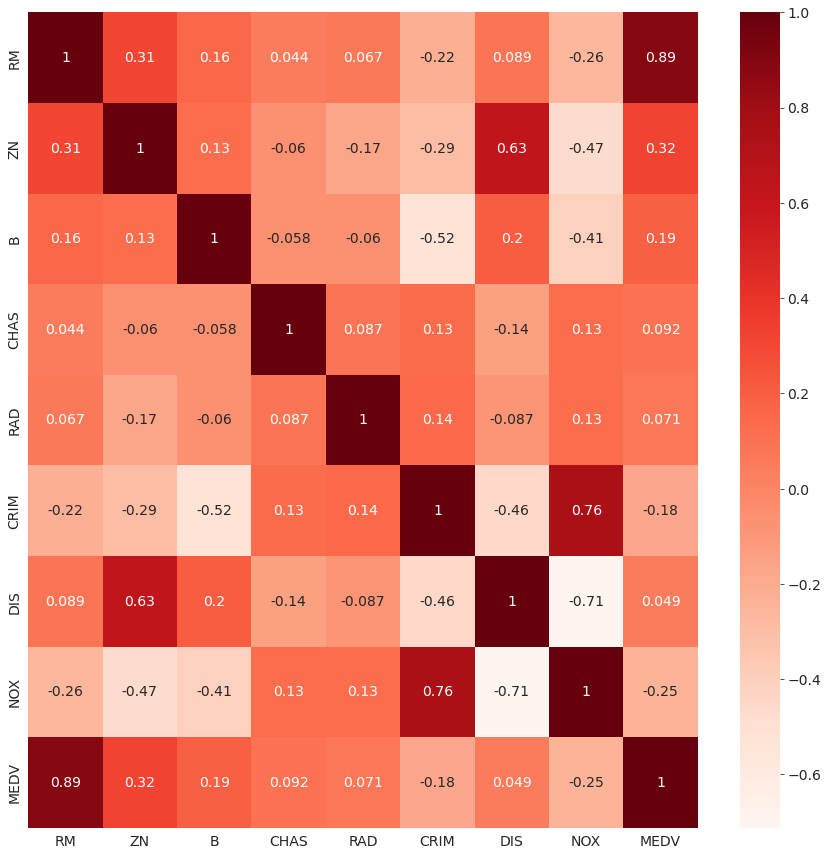

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(reg_corr,annot=True,cmap='Reds')
plt.show()

Inferences
We have learned a lot through this project.

A good EDA is necessary before implementing a model.

Data pre-processing and feature engineering can help us transform our data for a smooth implementation

Having a Train/Test set is useful due to its flexibility. However, it provides a high variance due to out-of-sample accuracy.

The model will generalize more(underfit) as the model complexity decreases. The model will become too accurate(overfit) having learned the noise of the data as the model complexity increases.

The process of preprocessing, checking the distribution, feature engineering, model iteration is an iterative process.

Linear regression is fast, interpretable , and well understood. however, it is may not be the best predictive accuracy as it assumes a linear relationship between the inputs and the target

## Predicting Boston Housing Prices : Step-by-step Linear Regression tutorial from scratch in Python

https://github.com/Mortiniera/Data_Science_Portfolio/blob/master/Machine%20Learning%20Series/Boston_houses_Linear_Regression.ipynb

### 2.1 Exploratory Analysis

In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import datetime
import math

In [80]:
boston = load_boston()
boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_dataset['MEDV'] =  boston.target

/home/ernesto/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [82]:
boston_dataset = pd.read_csv("./Data/boston.csv")

In [84]:

boston_dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

### 2. Feature Selection


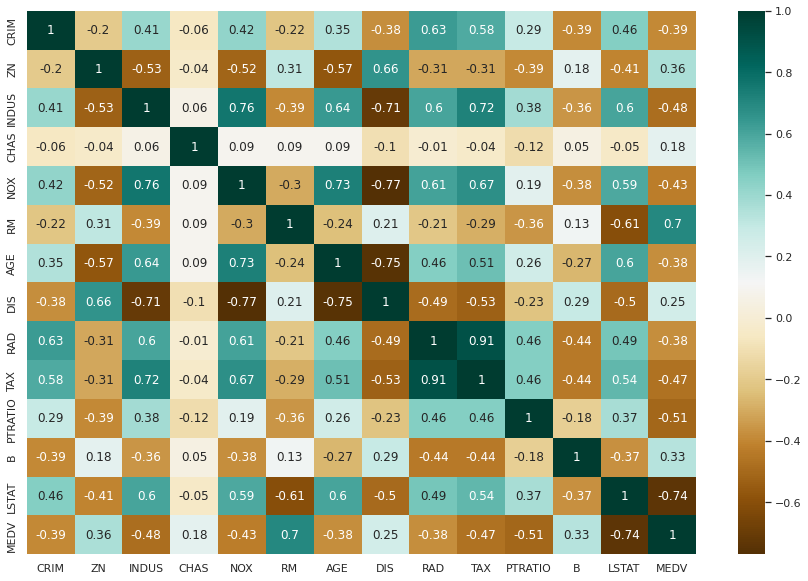

In [85]:
corr_matrix = boston_dataset.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap="BrBG")
plt.show()

In [86]:
#Relevant features are features highly correlated with our target variable
relevant_features = abs(corr_matrix["MEDV"])
relevant_features = relevant_features[relevant_features > 0.5]

In [87]:
relevant_features


RM         0.70
PTRATIO    0.51
LSTAT      0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [88]:
#Because of Least Squares Assumptions (LSA), the independant variables (features) must be uncorrelated with each other
boston_dataset[["RM", "PTRATIO", "LSTAT"]].corr().round(2)

RM  PTRATIO  LSTAT
RM       1.00    -0.36  -0.61
PTRATIO -0.36     1.00   0.37
LSTAT   -0.61     0.37   1.00

We see that RM and LSTAT are highly correlated with each other, hence we should select only one of them. We choose here to take the one wich is more correlated with the target variable, hence we keep LSTAT.

In [89]:
X = boston_dataset[['PTRATIO', 'LSTAT']]
y = boston_dataset.MEDV

### 3. Data Preprocessing


In [90]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    
    # set seed to have reproducible/consistent results
    np.random.seed(seed)
    
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    
    # create split
    x_tr = x.iloc[index_tr]
    x_te = x.iloc[index_te]
    y_tr = y.iloc[index_tr]
    y_te = y.iloc[index_te]
    return x_tr, x_te, y_tr, y_te

def standardize(x):
    """Standardize the original data set."""
    return (x - x.mean(axis=0))/ x.std(axis=0)

def build_model_data(x):
    """Form tX to get regression data in matrix form. tX is X with intercept"""
    num_samples = y.shape[0]
    x["INTERCEPT"] = pd.Series(np.ones(num_samples))
    return x

def prepare_model(X, y, r, s) :
    """Apply all previous helper functions to preprocess data"""
    
    X_train, X_test, y_train, y_test = split_data(X, y, r, seed=s)
    
    X_train = standardize(X_train)
    X_train = build_model_data(X_train)
    
    X_test = standardize(X_test)
    X_test = build_model_data(X_test)
    
    return X_train, X_test, y_train, y_test

In [91]:
X_train, X_test, y_train, y_test = prepare_model(X, y, 0.9, 1)


### 4. Pandas/Numpy implementation


In [92]:
def mse(e):
    """Compute the mse for the error vector e."""
    return 1/2*np.mean(e**2)

def compute_gradient(y, tx, w):
    """Compute the gradient."""
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err

In [93]:
def gradient_descent(y, tx, initial_w, max_iters, gamma, epsilon = 10e-5):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    prev = math.inf
    for n_iter in range(max_iters):
        # compute loss, gradient and rmse(actual loss)
        grad, err = compute_gradient(y, tx, w) 
        loss = np.sqrt(2 * mse(err))
        # gradient w by descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        #Stop earlier if we reached convergence
        if(abs(loss - prev) < epsilon) :
            print("Reached Convergence !")
            break
        prev = loss
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}, w2={w2}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1], w2=w[2]))

    return losses, ws

In [94]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y_train, X_train, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

#Get final weights
params = gradient_ws[-1]

#Model is y = w2 + w0*PTRATIO + w1*LSTAT
pred = params[2] + params[0]*X_test.PTRATIO + params[1]*X_test.LSTAT

Gradient Descent(0/49): loss=24.61436907245775, w0=-3.272907430094308, w1=-4.805168507903804, w2=15.944923076923075
Gradient Descent(1/49): loss=9.087882735556308, w0=-3.0051969192237102, w1=-5.39956334055006, w2=20.728400000000036
Gradient Descent(2/49): loss=6.259891262460132, w0=-2.769276837267815, w1=-5.648694816767846, w2=22.163443076923123
Gradient Descent(3/49): loss=5.924440708887851, w0=-2.6330902272978456, w1=-5.785415706856919, w2=22.59395600000005
Gradient Descent(4/49): loss=5.8882647289553525, w0=-2.5563272296869877, w1=-5.862200311214201, w2=22.72310987692312
Gradient Descent(5/49): loss=5.883397595999118, w0=-2.513131957296604, w1=-5.90539645739995, w2=22.761856040000044
Gradient Descent(6/49): loss=5.882452610069757, w0=-2.488828511062295, w1=-5.929699938971293, w2=22.77347988892312
Gradient Descent(7/49): loss=5.8822071271486545, w0=-2.4751545064783596, w1=-5.943373944984288, w2=22.77696704360004
Reached Convergence !


In [95]:
#Evaluate performance

exection_time_np = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time_np))
train_loss_np = gradient_losses[-1]
print("Train loss : {}".format(train_loss_np))
test_loss_np = np.sqrt(2 * mse(y_test - pred))
print("Test loss : {}".format(test_loss_np))

Gradient Descent: execution time=0.024 seconds
Train loss : 5.882134247497131
Test loss : 5.146806236501715


### 5. Sklearn implementation


In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
model = LinearRegression()
start_time = datetime.datetime.now()
model.fit(X_train, y_train)
end_time = datetime.datetime.now()

exection_time_sk = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time_sk))
train_loss_sk = np.sqrt(2 * mse(y_train - model.predict(X_train)))
print("Train loss : {}".format(train_loss_sk))
test_loss_sk = np.sqrt(2 * mse(y_test - model.predict(X_test)))
print("Test loss : {}".format(test_loss_sk))

Gradient Descent: execution time=0.018 seconds
Train loss : 5.88210118974494
Test loss : 5.149021510727107


### 6. Conclusion
Finally, we got comparable results in terms of performance on train and test set with respect to the RMSE metric. However, sklearn source code uses Least squares method along with other parallel optimization to make its training slightly more efficient. (training in 0.012 seconds with their implementation compared to ours with 0.036 seconds). Furthermore, sklearn implementation leads to smaller and more compact code.

## Simple and Multiple Linear Regression in Python



In [100]:
import statsmodels.api as sm


In [101]:
from sklearn import datasets ## imports datasets from scikit-learn


In [104]:
df= pd.read_csv("./Data/boston.csv")

In [103]:
import numpy as np
import pandas as pd

In [107]:
# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(df.MEDV, columns=["MEDV"])

In [108]:
import statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

In [109]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Sun, 23 Oct 2022   Prob (F-statistic):                   3.74e-256
Time:                        14:53:26   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
import statsmodels.api as sm # import statsmodels 

X = df["RM"] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           2.49e-74
Time:                        14:53:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
X = df[["RM", "LSTAT"]]
y = target["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Sun, 23 Oct 2022   Prob (F-statistic):                        0.00
Time:                        14:54:18   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
from sklearn import linear_model


In [114]:
X = df
y = target["MEDV"]

In [115]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [116]:
predictions = lm.predict(X)
print(predictions)[0:5]

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

TypeError: 'NoneType' object is not subscriptable

In [117]:
lm.score(X,y)

1.0

In [118]:
lm.coef_

array([-8.54790267e-17, -2.49800181e-16, -5.85252333e-16, -1.44037004e-14,
       -5.88240665e-16,  1.13667078e-15, -1.84314369e-16, -4.45715513e-16,
       -2.58907479e-16, -1.04083409e-17,  7.64633582e-17, -2.98372438e-16,
       -4.51461785e-16,  1.00000000e+00])

In [119]:
lm.intercept_

1.3855583347321954e-13

## Linear Regression


In [120]:
import pandas as pd 
import numpy as np 

In [121]:
x = 2.5*np.random.randn(100) + 1.5
res = .5*np.random.randn(100)+0

In [122]:
ypred = 2+ .3*x
yact = 2 + 3*x+res

In [125]:
xlist = x.tolist()
ypredlist = ypred.tolist()
yactlist = yact.tolist()

In [126]:
df = pd.DataFrame({'Input_Variable(X)': xlist,'Predicted_Output(ypred)':ypredlist,'Actual_Output(yact)': yactlist})

In [127]:
df .head()

Input_Variable(X)  Predicted_Output(ypred)  Actual_Output(yact)
0           3.832612                 3.149784            13.997377
1           3.509718                 3.052915            12.515938
2           5.563696                 3.669109            19.210716
3          -0.363365                 1.890990             1.806875
4           2.561342                 2.768403             9.687934

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [131]:
x = 2.5*np.random.randn(100) + 1.5
res = .5*np.random.randn(100)+0
ypred = 2+ .3*x
yact = 2 + 3*x+res
xlist = x.tolist()
ypredlist = ypred.tolist()
yactlist = yact.tolist()
ymean=np.mean(yact)
yavg = [ymean for i in range(1,len(xlist)+1)]

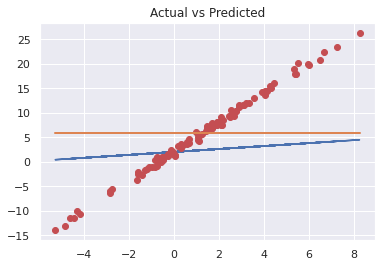

In [132]:
plt.plot(x,ypred)
plt.plot(x,yact,'ro')
plt.plot(x,yavg)
plt.title('Actual vs Predicted')
plt.show()